Hooke's Law is the simplest theoretical model of molecular vibrations, which involves a linear restraining force, as shown in Equation 1. Here, $k$ is referred to as the proportionality constant and $r-r_0$ is the displacement from an equilibrium position, $r_0$.

$$ F = k\left(r-r_0\right) = kx \qquad \left(1\right)$$

Classically, integrating Hooke's Law with respect to position results in a potential energy equation that describes a simple harmonic oscillator. Here, k is still a proportionality constant, but it's called the force constant.

$$ V(x) = \frac{1}{2}k\left(r-r_0\right)^2 = \frac{1}{2}k\left(x\right)^2 \qquad \left(2\right)$$

Near room temperature, this potential energy equation provides a good approximation for the internuclear potential energy of a vibrating diatomic molecule, for which $r_0$ refers to the equilibrium bond length. Therefore, we can use this harmonic oscillator approximation to solve the one-dimensional Schrodinger equation for the energy levels of a diatomic. For this problem, the Hamiltonian is as follows, in which the total energy of the system is the sum of the kinetic and potential energies of the molecule:

$$E(x) = K(x) + V(x) = \frac{1}{2}mv^2 + \frac{1}{2}kx^2$$

$$\hat{H} = \hat{K} + \hat{V} = -\frac{\hbar^2}{2\mu}\frac{d^2}{dx^2} + \frac{1}{2}kx^2 $$

$$ \frac{-\hbar^2}{2\mu}\frac{d^2\psi}{dx^2} + V\left(x\right)\psi\left(x\right) = E\psi\left(x\right) $$

The solution to this equation is a set of evenly spaced energy levels or vibrational frequencies, $\nu$.

$$ E = h \nu\left(n+\frac{1}{2}\right) \qquad \nu = \frac{1}{2 \pi}\sqrt{\frac{k}{\mu}} \qquad n = 0, 1, 2... \qquad \left(3\right) $$




## Analytic Solution to the Harmonic Oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

The general solution to the harmonic oscillator quantum mechanical Hamiltonian is given on page 225 of McQuarrie

$\psi_n(x) = N_{n}H_n(\alpha^{1/2}x)e^{-\alpha x^2/2}$

where

$N_{n} = \frac{1}{(2^nn!)^{1/2}}\left(\frac{\alpha}{\pi}\right)^{1/4}$

and $H_n(x)$ are Hermite polynomials,

$H_n(x) = (-1)^ne^{x^2}\frac{d^n}{dx^2}\left(e^{-x^2}\right)$.

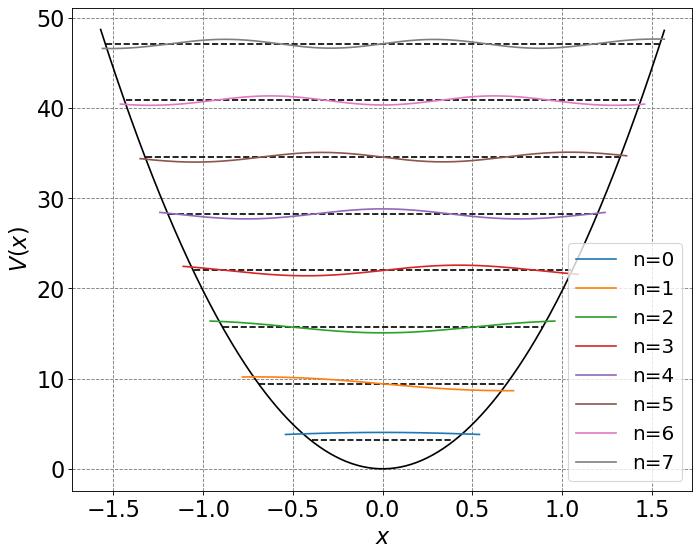

In [3]:
# let's plot the energy levels and wave functions
from scipy.special import hermite
from scipy.special import factorial

# start by defining N function
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25

# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
omega = 2*np.pi
alpha = omega/np.pi
x = np.arange(-np.pi/2.0,np.pi/2.0,0.01)
U = 0.5 * (omega)**2 * x**2
ax.plot(x, U, 'k')
for n in range(8):
    # compute and plot energy levels
    evals = hbar*omega*(n+0.5)
    mask = np.where(evals > U)  
    ax.plot(x[mask], evals * np.ones(np.shape(x))[mask], 'k--')
    # compute and plot wavefunctions
    psi = (-1)**n*Nn(n,alpha)*hermite(n)(np.sqrt(alpha)*x)*np.exp(-alpha*x**2/2.0)
    Y = psi+evals  # shift wavefunction up in Y to be at energy level
    label = "n="+str(n)
    mask = np.where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real,label=label)
plt.legend(fontsize=18)

## Variational Solution to the Harmonic Oscillator

Let's reconsider a harmonic oscillator with the Hamiltonian:

$$\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + \frac{1}{2}x^2$$

We can solve this problem using the variational principle with gaussian basis functions and compare these results to the analytic solution. To do so, we start by approximating the wavefunction, $\psi(x)$, as an expansion of gaussians:

$$\psi(x) \approx \sum_{i=1}^Nc_ie^{-\alpha(x-x_i)^2}$$

in which $g_i(x) = e^{-\alpha(x-x_i)^2}$ is the $i$th gaussian basis function with width $1/\alpha$ and centered at $x_i$. Then, we derive expressions for the following matrix elements:

$$ H_{ij} = \langle g_i|\hat{H}|g_j\rangle$$

and

$$ S_{ij} = \langle g_i|g_j\rangle $$

Note that since $\hat{H} = \hat{K} + \hat{V}$ we can write the Hamiltonian matrix element as a sum: 

$$ H_{ij} = \langle g_i|\hat{K}|g_j\rangle + \langle g_i|\hat{V}|g_j\rangle$$

Performing the integrals and simplifying the algebra leads to:

$$ H_{ij} = \frac{1}{2}\sqrt{\frac{\pi}{2\alpha}}e^{-0.5\alpha(x_i-x_j)^2}\left(\alpha - \alpha^2(xi-xj)^2 + \frac{1}{4}(\frac{1}{\alpha} + (x_i+x_j)^2) \right)$$

and

$$ S_{ij} = \sqrt{\frac{\pi}{2\alpha}}e^{-0.5\alpha(x_i-x_j)^2} $$

A brief note on the algebra: the product of two gaussians yields a gaussian (You have to complete the square in the exponent).  E.g.

$$ e^{-\alpha(x-x_i)^2}e^{-\alpha(x-x_j)^2} = e^{-1/2\alpha(x_i-x_j)^2}e^{-2\alpha\left(x-\frac{x_i+x_j}{2}\right)^2}$$

in which the first term on the right-hand side of the above equality is a constant (exponent does not depend on $x$) and the second term is a guassian centered at $\frac{x_i+x_j}{2}$.

The goal now is to diagonlize (/compute eigenvalues and eigenvectors of) the matrix $\mathbf{S}^{-1}\mathbf{H}$.  To do so, we choose the number of gaussians, the width of the gaussians, and the spacing of the gaussians.  We will investigate the effect of changing the number of guassians but fix the width to be one ($\alpha = 1$) and fix the spacing to be 0.4.  The subsequent code computes the two matrices, diagonalizes the product, and then returns the variational energies and normalized variational wavefunctions.  

In [9]:
from scipy import integrate
# variational principle basis set solution to the harmonic oscillator - basis functions are guassians
def basis_ho(N): # N is half the number of basis functions
    K = 2*N+1                    # total number of basis functions to make it symmetric
    dx = 0.4                     # spacing between basis functions
    alpha = 1.0                  # 1/spread of basis functions
    xvals = np.arange(-4,4,0.01)  # x domain for psi
    xmin = -N*dx                 # minimum x value for basis functions
    xIntMin = xmin - 10.0*1.0/alpha
    xIntMax = N*dx + 10.0*1.0/alpha
    xInt = np.arange(xIntMin,xIntMax,0.01)
#this is generic; any number of basis functions can be evaluated using this code; the larger the basis set, the better the approximation    
    
    S = np.zeros((K,K),dtype=float)   # basis function overlap matrix
    H = np.zeros((K,K),dtype=float)   # Hamiltonian matrix

    # populate the basis function, S, and Hamiltonian, H, matrices
    for i in range(K):
        xi = xmin + (i-1)*dx
        for j in range(K):
            xj = xmin + (j-1)*dx
            # basis function value:
            S[i,j] = np.sqrt(0.5*np.pi/alpha)*np.exp(-0.5*alpha*(xi-xj)**2)
            # Hamiltonian value (standard Harmonic Oscillator matrix element - applied to basis functions)
            #the following statement is only applicable for the Harmonic Oscillator
            H[i,j] = 0.5*S[i,j]*(alpha - (alpha**2)*(xi-xj)**2 + 0.25*(1.0/alpha + (xi+xj)**2) ) #this is an analytic approach to solving for sum of potential and kinetic energies, more difficult to do for other potential energy operators!!
   
    # finalize the S^-1*H*S matrix
    SinvH = np.dot(np.linalg.inv(S),H)
    # compute eigenvalues and eigenvectors
    H_eig_val, H_eig_vec = np.linalg.eig(SinvH)
    # reorder these so smallest eigenvalue is first
    idx = H_eig_val.argsort()   
    H_eig_val = H_eig_val[idx]
    H_eig_vec = H_eig_vec[:,idx]

    nx = xvals.size
    psi = np.zeros((nx,K),dtype=float)
    psiNorm = np.zeros(xInt.size,dtype=float)
    # generate psis from coefficients
    for A in range(K):
        count = K-A-1
        psiNorm = 0.0
        for i in range(K):
            xi = xmin + (i-1)*dx
            psi[:,A] = psi[:,A] + H_eig_vec[i,A]*np.exp(-alpha*(xvals-xi)**2)
            psiNorm = psiNorm + H_eig_vec[i,A]*np.exp(-alpha*(xInt-xi)**2)
    
        # normalize the wavefunctions
        psi2 = np.power(psiNorm,2)
        norm = integrate.simps(psi2,xInt)
        psi[:,A] /= np.sqrt(norm)

    return psi, H_eig_val

In [10]:
# compute psis:
psi5, E5 = basis_ho(5)
psi10, E10 = basis_ho(10)

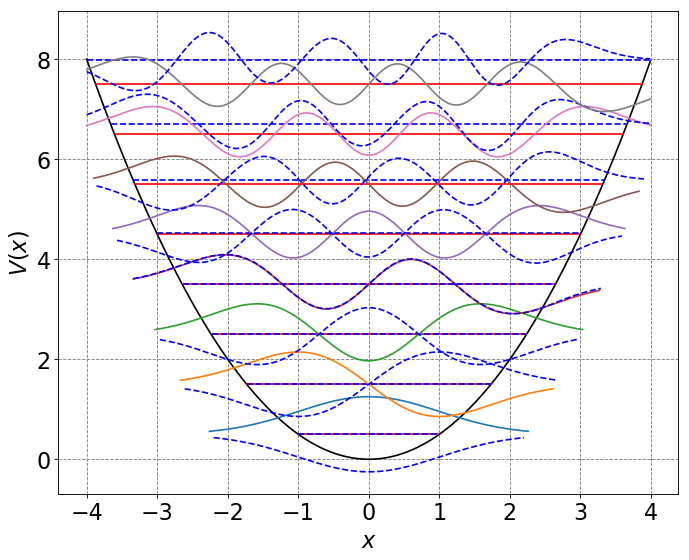

In [11]:
# let's plot the energy levels and wave functions
from scipy.special import hermite
from scipy.special import factorial
# start by defining N function for analytic solution to HO wavefunctions
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25

# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
k = 1.0
m = 1.0
omega = np.sqrt(k/m)
alpha = np.sqrt(k*m)/hbar
x = np.arange(-4,4,0.01)
x2 = np.power(x,2)
U = 0.5 * (omega)**2 * x**2
ax.plot(x, U, 'k')
for n in range(8):
    # compute and plot energy levels
    evals = hbar*omega*(n+0.5)
    mask = np.where(evals > U)  
    ax.plot(x[mask], evals * np.ones(np.shape(x))[mask], 'r-', label="analytic")
    # plot variational energy levels
    mask = np.where(E5[n] > U)  
    ax.plot(x[mask], E5[n] * np.ones(np.shape(x))[mask], 'b--',label="variational")
    # compute and plot analytic wavefunctions
    psi = (-1)**n*Nn(n,alpha)*hermite(n)(np.sqrt(alpha)*x)*np.exp(-alpha*x2/2.0)
    Y = psi+evals  # shift wavefunction up in Y to be at energy level
    label = "n="+str(n)
    mask = np.where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real)
    # plot variational wavefunctions
    Y = psi5[:,n]+E5[n]  # shift wavefunction up in Y to be at energy level
    label = "n="+str(n)
    mask = np.where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real,'b--')
#plt.legend(fontsize=18)

***In the code above, use the "print" function to print out the Hamiltonian, overlap, and eigenvalue matrices.***

## Morse Oscillator

The Morse Oscillator is a better theoretical model of molecular vibrations because the Morse oscillator accounts for the possibility of bond dissociation. The potential energy equation for the Morse oscillator is as follows, in which $k$ is the proportionality constant, $D$ is the bond energy, and $r - r_0$ represents the displacement from the equilibrium bond position, $r_0$.

$$V_{morse} = D_e \beta \left(1-e^{-\beta \left(r-r_0\right)}\right)^2 = \sqrt {\frac{k}{2D}} \qquad \left(1\right)$$

Solving this quantum mechanical problem results in a set of unevenly spaced energy levels or frequencies, $\nu$.

$$E_{morse} = \nu \left(n+\frac{1}{2}\right) - \nu x \left(n+\frac{1}{2}\right)^2 = \qquad \left(2\right) $$

$$ \nu \left(n+\frac{1}{2}\right) \left(1-x\left(n+\frac{1}{2}\right)\right) \qquad x = \frac{hc\nu}{4D} $$


## What does the Morse Oscillator Potential Energy Curve Look Like Compared to the Harmonic Oscillator?

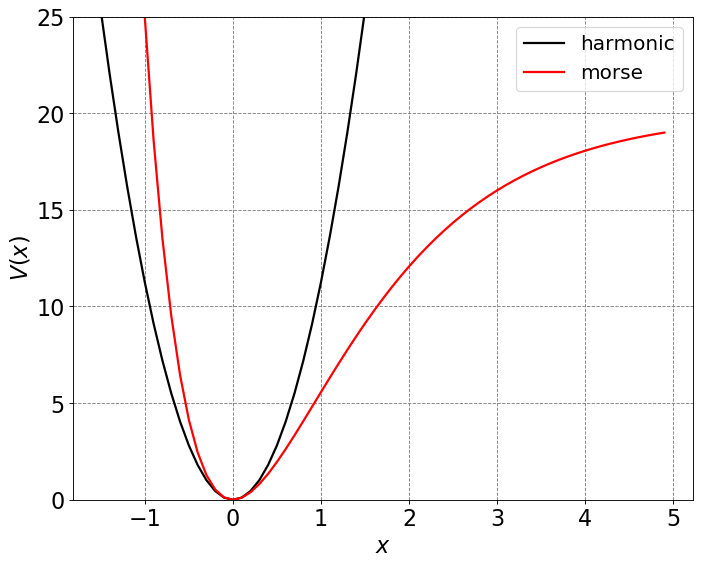

In [12]:
# plot morse potential and harmonic potential
De = 20.0
beta = 0.75
xvals = np.arange(-1.5,5,0.1)

# second order Taylor series expansion of Morse potential
def harmonic(x):
    return De*beta**2*x**2
def morse(x):
    return De*(1-np.exp(-beta*x))**2

ax = define_figure(xlabel="$x$",ylabel="$V(x)$")

# compute potential energies
U_h = harmonic(xvals)
U_morse = morse(xvals)

# plot potential energies
ax.plot(xvals, U_h, 'k',lw=2,label="harmonic")
ax.plot(xvals, morse(xvals), 'r',lw=2,label="morse")
ax.set_ylim(0,25)
plt.legend(fontsize=18)

## Variational Solution to the Morse Oscillator

A similar process that was done for the harmonic oscillator above can be done for a Morse Oscillator. 

The following code computes the $H_{ij}$ and $S_{ij}$ matrices, diagonalizes the product of those matrices, and then returns the variational energies and normalized variational wavefunctions for a Morse oscillator.

In [13]:
# code to perform Variational principle solution to expansion of wavefunctions in a gaussian basis to K+V Hamiltonian in 1D
from scipy import integrate

# integrand for potential component of Hamiltonian matrix element for gaussian basis functions
def integrand(x,V,xi,xj,alpha):
    return np.exp(-alpha*(x-xi)**2)*V(x)*np.exp(-alpha*(x-xj)**2) #trial wavefunction 
#this function is generic! Can substitute any potential operator into the V(x) placeholder

# variational principle basis set solution for KE plus V (typically harmonic) - basis functions are guassians
def basis_V(N,V,xvals=np.arange(-4,4,0.1)):
    #N = 3                       # half the number of basis functions
    K = 2*N+1                    # total number of basis functions #keeps K above zero, which keeps i and j greater than zero
    dx = 0.4                     # spacing between basis functions
    alpha = 1.0                  # 1/spread of basis functions
    xmin = -N*dx                 # minimum x value for basis functions
    xIntegrand = np.arange(xmin-1.0/alpha*10,N*dx+1.0/alpha*10,0.01) #ten standard deviations from the maximum of the gaussians at the farthest x values
    S = np.zeros((K,K),dtype=float)   # basis function overlap matrix
    H = np.zeros((K,K),dtype=float)   # Hamiltonian matrix, Hij = <gi|H|gj>

    # populate the basis function, S, and Hamiltonian, H, matrices
    for i in range(K):
        xi = xmin + (i-1)*dx
        for j in range(K):
            xj = xmin + (j-1)*dx
            # basis function value:
            S[i,j] = np.sqrt(0.5*np.pi/alpha)*np.exp(-0.5*alpha*(xi-xj)**2)
            # Hamiltonian value (standard Harmonic Oscillator matrix element - applied to basis functions)
            H[i,j] = 0.5*S[i,j]*(alpha - (alpha**2)*(xi-xj)**2) # Kinetic energy #the kinetic energy operator is identical for any type of oscillator (morse, lennard jones, harmonic, anharmonic, etc)
#            H[i,j] += integrate.quad(integrand,-np.inf,np.inf,args=(V,xi,xj,alpha))[0] # potential energy using numeric integration
            H[i,j] += integrate.simps(integrand(xIntegrand,V,xi,xj,alpha),xIntegrand)
    # finalize the S^-1*H*S matrix
    SinvH = np.dot(np.linalg.inv(S),H)
    # compute eigenvalues and eigenvectors
    H_eig_val, H_eig_vec = np.linalg.eig(SinvH)
    # reorder these so largest eigenvalue is first
    idx = H_eig_val.argsort()   
    H_eig_val = H_eig_val[idx]
    H_eig_vec = H_eig_vec[:,idx]

    nx = xvals.size
    psi = np.zeros((nx,K),dtype=float)
    psiNorm = np.empty(xIntegrand.size,dtype=float)
    # generate psis from coefficients
    for A in range(K):
        count = K-A-1
        psiNorm = 0.0
        for i in range(K):
            xi = xmin + (i-1)*dx
            psi[:,A] = psi[:,A] + H_eig_vec[i,A]*np.exp(-alpha*(xvals-xi)**2)
            psiNorm = psiNorm + H_eig_vec[i,A]*np.exp(-alpha*(xIntegrand-xi)**2)
    
        # normalize the wavefunctions
        psi2 = np.power(psiNorm,2)
        norm = float(integrate.simps(psi2,xIntegrand))
        psi[:,A] /= np.sqrt(norm)
    # return normalized wavefunctions and energies
    return psi, H_eig_val

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


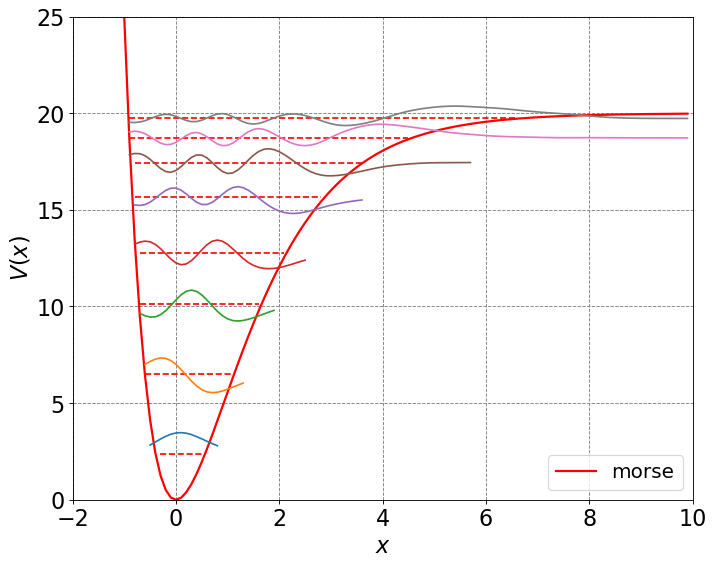

In [7]:
De = 20.0
beta = 0.75
xvals = np.arange(-3,10,0.1)

def morse(x):
    return De*(1-np.exp(-beta*x))**2 #this is not the taylor-expansion of the morse potential, but rather the complete function!


# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")

# compute potential energies #simply input the domain values and store the y values
U_morse = morse(xvals)

# plot potential energies
ax.plot(xvals, morse(xvals), 'r',lw=2,label="morse")

# compute wavefunctions and energies for these potential functions
psi_morse, E_morse = basis_V(18,morse,xvals) #uses the above code

# plot morse energy levels and wavefunctions
for n in range(10):
    if (E_morse[n] <= De):
        # plot the energy level
        mask = np.where(E_morse[n] > U_morse)  
        ax.plot(xvals[mask], E_morse[n] * np.ones(np.shape(xvals))[mask], 'r--')
        # plot the wavefunction
        Y = psi_morse[:,n]+E_morse[n]
        mask = np.where(Y > U_morse-2.0)
        ax.plot(xvals[mask], Y[mask].real)  
        
ax.set_xlim(-2, 10)
ax.set_ylim(0, 25)
ax.legend(loc=4,fontsize=18)

***In the code above, use the "print" function to print out the Hamiltonian, overlap, and eigenvalue matrices. How do the magnitudes compare to those seen for the harmonic oscillator case?***

## Practice

The anharmonic oscillator is another model that, unlike the Morse oscillator, does not account for bond dissociation, but, it does account for other deviations from typical harmonic oscillation.

The potential energy equation for the anharmonic oscillator is:

$$V_{anharmonic} = D_e \beta^2 \left(r-r_0\right)^2 + D_e \beta^3 \left(r-r_0\right)^3 +D_e \beta^4 \left(r-r_0\right)^4 = $$

$$ D_e \left(\beta x\right)^2 + D_e \left(\beta x\right)^3 +D_e \left(\beta x\right)^4 \qquad \left(1\right)$$

Additionally, the vibrational energy levels (out to the cubic term) of the anharmonic oscillator are:

$$E_{anharmonic} = \left(n+\frac{1}{2}\right) \nu_e - \left(n+\frac{1}{2}\right)^2 \nu_e x_e + \left(n+\frac{1}{2}\right)^3 \nu_e y_e - ...  \qquad \left(2\right) $$

in which $x_e$ and $y_e$ are the first and second anharmonicity constants. 

***In the cells below, compute the variational solution to the anharmonic oscillator using the given values for $D_e$ and $\beta$ (you can use the gaussian basis routine that is outlined above). After doing so, you can change the values of $D_e$ and $\beta$ to see how this alters the shape of the potential curve.***

In [3]:
De = 20.0
beta = 0.75
xvals = np.arange(-4,4,0.1)
